In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

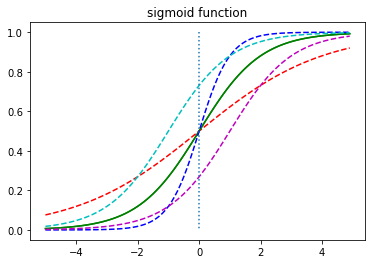

In [16]:
# binary classification using by logistic regression
# hypothesis -> h(x) = f(Wx+b)
# output will be 0 ~ 1 inside through sigmoid function
# f -> sigmoid function
# np.exp -> natural constant
def sigmoid(x):
    return 1/(1+np.exp(-x))
# array -> -5.0<= ~ < 5.0 range, increment 0.1
# if w is increase, gradient increase
# if b is increase, graph move back
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)
y4 = sigmoid(x+1)
y5 = sigmoid(x-1)
plt.plot(x, y, 'g')
# w: 1, b: 0
plt.plot(x, y1, 'r', linestyle= '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle= '--')
plt.plot(x, y4, 'c', linestyle= '--')
plt.plot(x, y5, 'm', linestyle= '--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('sigmoid function')
plt.show()

In [21]:
# logistic regresion study
# if restart, get same result. random seed set
torch.manual_seed(1)
# train data
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# hypothesis
# hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
# one element get error mathematical expression
# -(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1 - hypothesis[0]))
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
# cost -> error mean
# cost = losses.mean()
cost = F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [32]:
# logistic regression
# if restart, get same result. random seed set
torch.manual_seed(1)
# train data
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# set W, b
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer
optimizer = optim.SGD([W,b], lr=1)
# training
nb_epochs = 30000
for epoch in range(nb_epochs + 1):
    # hypothesis
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    # cost function
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()
    # cost -> hypothesis update
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # print log
    if epoch % 3000 == 0:
        print('Epoch {:4d}/{} Cost: {:.56f}'.format(epoch, nb_epochs, cost.item()))
result = torch.sigmoid(x_train.matmul(W)+ b)
print(result)
print(result >= torch.FloatTensor([0.5]))
print(W, b)

Epoch    0/30000 Cost: 0.69314718246459960937500000000000000000000000000000000000
Epoch 3000/30000 Cost: 0.00696457037702202796936035156250000000000000000000000000
Epoch 6000/30000 Cost: 0.00353240850381553173065185546875000000000000000000000000
Epoch 9000/30000 Cost: 0.00236646085977554321289062500000000000000000000000000000
Epoch 12000/30000 Cost: 0.00177919550333172082901000976562500000000000000000000000
Epoch 15000/30000 Cost: 0.00142544473055750131607055664062500000000000000000000000
Epoch 18000/30000 Cost: 0.00118904106784611940383911132812500000000000000000000000
Epoch 21000/30000 Cost: 0.00101991079282015562057495117187500000000000000000000000
Epoch 24000/30000 Cost: 0.00089288462186232209205627441406250000000000000000000000
Epoch 27000/30000 Cost: 0.00079400971299037337303161621093750000000000000000000000
Epoch 30000/30000 Cost: 0.00071483250940218567848205566406250000000000000000000000
tensor([[6.9511e-08],
        [1.1953e-03],
        [1.3963e-03],
        [9.9831e-01],
   